In [10]:
import pynini
from pynini.lib import rewrite
from pynini.lib import pynutil

In [2]:
bruh = pynini.Fst()

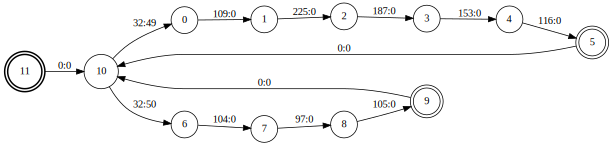

In [26]:
bruh = pynini.Fst()
bruh |= pynini.cross('một', '1')
bruh |= pynini.cross('hai', '2')
bruh.rmepsilon()
bruh.closure()

In [36]:
pynini.project(bruh)
tattice = pynini.compose('một', bruh)

FstArgError: Unknown projection type: 'một'

In [29]:
rewrite.top_rewrite('một một hai', bruh)

Error: Composition failure

In [26]:
lattice.string()

FstOpError: Operation failed

In [4]:
from nemo_text_processing.inverse_text_normalization.inverse_normalize import InverseNormalizer

In [5]:
smt = InverseNormalizer()

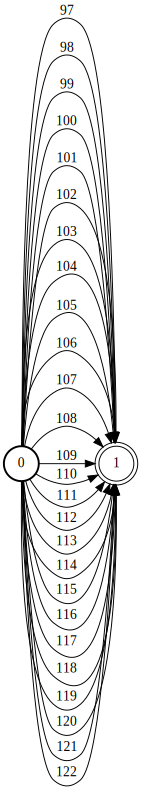

In [37]:
pynini.union(*string.ascii_lowercase).optimize()

In [21]:
smt.inverse_normalize('minus one million fifty', verbose=True)

tokens { cardinal { negative: "-" integer: "1000050" } }


'-1000050'

In [26]:
from pynini.lib import pynutil

In [46]:
pynutil.add_weight(pynutil.insert("username: \""), 20)

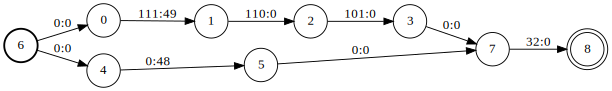

In [34]:
pynini.union(pynini.cross('one', '1'), pynutil.insert("0"),) + pynutil.delete(' ')

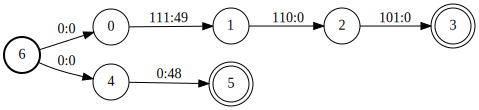

In [33]:
pynini.cross('one', '1') | pynutil.insert("0")

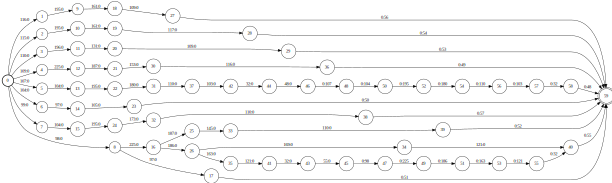

In [24]:
pynini.string_file("/home/viet/wfst/nemo_text_processing/inverse_text_normalization/data/numbers/digit.tsv").optimize()

In [50]:
bro = pynini.cross('abcd', '1234') @ pynini.accep('1234')

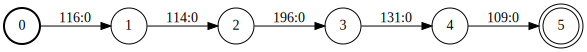

In [52]:
pynini.cross("trăm", "")

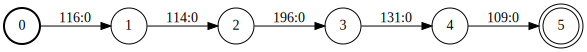

In [53]:
pynutil.delete("trăm")

In [54]:
graph_ten = pynini.cross('mười', '1') + pynini.union(graph_digit_any, pynini.insert('0'))

NameError: name 'graph_digit_any' is not defined

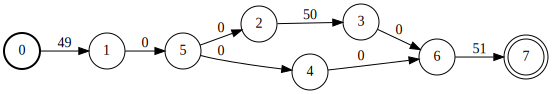

In [58]:
pynini.cross('1', '1') + pynini.union(pynini.cross('2', '2'), pynini.cross('', '')) + pynini.cross('3', '3')

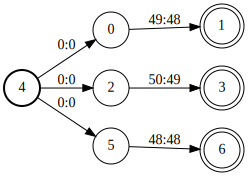

In [87]:
pynini.cross('1', '0') | pynini.cross('2', '1') | pynini.cross('0', '0')

In [66]:
import sys
print(sys.path)

['/home/viet/wfst', '/home/viet/.vscode/extensions/ms-toolsai.jupyter-2021.6.999662501/pythonFiles', '/home/viet/.vscode/extensions/ms-toolsai.jupyter-2021.6.999662501/pythonFiles/lib/python', '/home/viet/anaconda3/envs/wfst_no_nemo/lib/python39.zip', '/home/viet/anaconda3/envs/wfst_no_nemo/lib/python3.9', '/home/viet/anaconda3/envs/wfst_no_nemo/lib/python3.9/lib-dynload', '', '/home/viet/anaconda3/envs/wfst_no_nemo/lib/python3.9/site-packages', '/home/viet/anaconda3/envs/wfst_no_nemo/lib/python3.9/site-packages/IPython/extensions', '/home/viet/.ipython']


In [99]:
from pynini.lib.rewrite import rewrites

In [135]:
NEMO_DIGIT = pynini.union(*string.digits).optimize()
delete_space = pynutil.delete(" ")
graph_digit = pynini.string_file("/home/viet/wfst/nemo_text_processing/inverse_text_normalization/data/numbers/digit.tsv")
graph_digit_var = pynini.string_file("/home/viet/wfst/nemo_text_processing/inverse_text_normalization/data/numbers/digit_var.tsv")
graph_digit_any = graph_digit | graph_digit_var
graph_digit_non_zero = graph_digit @ pynini.difference(pynini.union(*string.digits).optimize(), '0')
graph_digit_any_non_zero = graph_digit_any @ pynini.difference(pynini.union(*string.digits).optimize(), '0')

graph_ten = pynini.string_file("/home/viet/wfst/nemo_text_processing/inverse_text_normalization/data/numbers/ten.tsv") + pynini.union(delete_space + graph_digit_any, pynutil.insert("0"))

graph_hundred = pynutil.delete("trăm")

graph_2_9_muoi = graph_digit_any_non_zero + pynini.union(delete_space + pynutil.delete("mươi"), pynini.cross('', '')) + pynini.union(delete_space + graph_digit_any_non_zero, pynutil.insert("0"))

graph_hundred_component = pynini.union(graph_digit + delete_space + graph_hundred, pynutil.insert("0"))
graph_hundred_component += pynini.union(
    pynini.union(delete_space, pynini.cross("", "") 
    + pynini.union(graph_ten, graph_2_9_muoi), pynutil.insert("00")))

graph_hundred_component_at_least_one_none_zero_digit = graph_hundred_component @ (
    pynini.closure(NEMO_DIGIT) + (NEMO_DIGIT - "0") + pynini.closure(NEMO_DIGIT)
)

graph_thousands = pynini.union(
    graph_hundred_component_at_least_one_none_zero_digit + delete_space + pynutil.delete("nghìn"),
    pynutil.insert("000", weight=0.1),
)

graph_million = pynini.union(
    graph_hundred_component_at_least_one_none_zero_digit + delete_space + pynutil.delete("triệu"),
    pynutil.insert("000", weight=0.1),
)
graph_billion = pynini.union(
    graph_hundred_component_at_least_one_none_zero_digit + delete_space + pynini.union(pynutil.delete("tỉ"), pynutil.delete("tỷ")),
    pynutil.insert("000", weight=0.1),
)

graph = pynini.union(
    # graph_sextillion
    # + delete_space
    # + graph_quintillion
    # + delete_space
    # + graph_quadrillion
    # + delete_space
    # + graph_trillion
    # + delete_space
    # graph_billion
    # + delete_space
    # + graph_million
    # + delete_space
    graph_thousands
    + delete_space
    + graph_hundred_component,
)

In [137]:
rewrites("bốn mươi lăm", graph_hundred_component_at_least_one_none_zerotgraph_hundred_component_at_least_one_non_zero_digit)

['045']

In [85]:
rewrites("bốn mươi lăm", graph_2_9_muoi)

['45']